In [45]:
import re
import pandas as pd

from urllib.request import urlopen
from urllib.error import HTTPError, URLError

from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
url = "http://www.terryhoknes.com/bestsellingcomics1990.htm"

try:
    html = urlopen(url)
except HTTPError as e:
    print(e)
except URLError as e:
    print("The server could not be found!")
else:
    bs = BeautifulSoup(html.read(), "html.parser")
    body = bs.body
    
    records = list()

In [24]:
for cell in body.find_all("td"):
    book_info = cell.text.split('\n')
    book_info = [b.strip() for b in book_info if b]
    book_info = ' '.join(book_info)

    title_match = re.search(r"#\d+ (.*?) [#(].*", book_info)
    title = title_match.group(1)

    issue_match = re.search(r"#\d+\s*.*?\s?#(\d+)\s?.*", book_info)
    issue_num = issue_match.group(1) if issue_match else None

    year_match = re.search(r".*?\((\d{4})\).*", book_info)
    year = year_match.group(1)

    price_match = re.search(r".*?\(\d{4}\)\s?\$(\d\.\d\d).*", book_info)
    cover_price = price_match.group(1) if price_match else None

    print_run_match = re.search(r".*Print run (.*?) copies[\.]?\s+(.*?)?\s?Price [Gg]uide value in 2015 - \$(\d+\.\d\d)", book_info)
    print_run = print_run_match.group(1)
    print_run = print_run_match.group(1)
    print_run = print_run.replace(" Million", 'e6')
    print_run = print_run.replace(",", '')

    notes = print_run_match.group(2)
    value_2015 = print_run_match.group(3)

    record = [title, issue_num, year, cover_price, print_run, notes, value_2015]
    records.append(record)

    comicdf = pd.DataFrame(records, columns=['Title', 'Issue', 'Year', 'CoverPrice', 'PrintRun', 'Notes', 'Value2015'])
    comicdf = comicdf.astype({'Issue': 'Int32', 'Year': 'Int32', 'CoverPrice': 'Float32', 'PrintRun': 'Float32', 'Value2015': 'Float32'})

In [25]:
comicdf

,Title,Issue,Year,CoverPrice,PrintRun,Notes,Value2015
0,X-FORCE,1,1991,1.5,5000000.0,came bagged with 5 different random cards incl...,5.0
1,ADVENTURES OF SUPERMAN,500,1993,2.95,3700000.0,White bag collectors edition version (there ar...,5.0
2,SUPERMAN,75,1992,<NA>,3000000.0,Black bag collectors edition (other covers lis...,30.0
3,SPIDER-MAN,1,1990,<NA>,2500000.0,Todd McFarlane art Biggest comic of 1990,8.0
4,X-MEN,1,1991,<NA>,2100000.0,Wolverine cover (other covers listed separatel...,8.0
...,...,...,...,...,...,...,...
210,NIGHTSTALKERS,1,1992,2.75,625000.0,52 page giant Polybagged with poster Part 5 of...,4.0
211,SHADOWHAWK,1,1992,2.5,625000.0,Image Comics Embossed silver foil stamped cove...,5.0
212,WETWORKS,2,1994,1.95,625000.0,"This comic had orders of 625,000 in 1993 at th...",3.0
213,INFINITY WAR,2,1992,2.5,625000.0,6 issue mini-series Wraparound gatefold coverf...,6.0


In [26]:
comicdf.head(10)


,Title,Issue,Year,CoverPrice,PrintRun,Notes,Value2015
0,X-FORCE,1,1991,1.5,5000000.0,came bagged with 5 different random cards incl...,5.0
1,ADVENTURES OF SUPERMAN,500,1993,2.95,3700000.0,White bag collectors edition version (there ar...,5.0
2,SUPERMAN,75,1992,<NA>,3000000.0,Black bag collectors edition (other covers lis...,30.0
3,SPIDER-MAN,1,1990,<NA>,2500000.0,Todd McFarlane art Biggest comic of 1990,8.0
4,X-MEN,1,1991,<NA>,2100000.0,Wolverine cover (other covers listed separatel...,8.0
5,X-MEN,1,1991,<NA>,2100000.0,Beast cover (other covers listed separately) #...,8.0
6,ACTION COMICS,687,1993,<NA>,2100000.0,Die-Cut Cover variant 1 of 4 monthly Superman ...,4.0
7,ADVENTURES OF SUPERMAN,501,1993,<NA>,2100000.0,Die-Cut Cover variant 1 of 4 monthly Superman ...,3.5
8,SUPERMAN,78,1993,<NA>,2100000.0,Die-Cut Cover variant 1 of 4 monthly Superman ...,4.0
9,SUPERMAN: MAN OF STEEL,22,1993,<NA>,2100000.0,Die-Cut Cover variant 1 of 4 monthly Superman ...,5.0


In [27]:
comicdf.sort_values(by="Value2015", ascending=False).head(10)


,Title,Issue,Year,CoverPrice,PrintRun,Notes,Value2015
208,INFINITY GAUNTLET,1,1991,2.5,625000.0,6 issue mini-series Thanos cover stories in al...,35.0
2,SUPERMAN,75,1992,<NA>,3000000.0,Black bag collectors edition (other covers lis...,30.0
16,SPAWN,1,1992,2.95,1700000.0,Image Comics Best selling Image comic of all time,28.0
46,SPAWN,9,1993,1.95,1100000.0,Neil Gaiman guest writer Jim Lee poster 1st ap...,28.0
61,AMAZING SPIDER-MAN,365,1992,3.95,925000.0,84 page giant. 30th anniversary issue with sil...,18.0
70,X-MEN,25,1993,3.5,900000.0,Wraparound cover with Gambit hologram on cover...,18.0
18,X-FORCE,2,1991,1.5,1500000.0,2nd app of Deadpool,15.0
187,GAMBIT,1,1993,2.5,700000.0,4 issue mini-series Gambit first solo series L...,15.0
161,SPAWN,3,1992,1.95,700000.0,Image Comics Todd McFarlane art,15.0
123,SPAWN,2,1992,1.95,750000.0,Image Comics 1st appearance The Violator 2nd a...,15.0


In [28]:
comicdf.describe()

,Issue,Year,CoverPrice,PrintRun,Value2015
count,213.0,215.0,199.0,215.0,215.0
mean,66.314554,1992.530233,2.15799,955348.0,5.488372
std,142.701495,1.259642,0.868874,501158.4375,4.274037
min,0.0,1990.0,0.09,625000.0,3.0
25%,1.0,1992.0,1.5,700000.0,4.0
50%,4.0,1993.0,1.95,780000.0,4.0
75%,23.0,1993.0,2.5,950000.0,5.0
max,689.0,2002.0,4.95,5000000.0,35.0


In [29]:
comicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       215 non-null    object 
 1   Issue       213 non-null    Int32  
 2   Year        215 non-null    Int32  
 3   CoverPrice  199 non-null    Float32
 4   PrintRun    215 non-null    Float32
 5   Notes       215 non-null    object 
 6   Value2015   215 non-null    Float32
dtypes: Float32(3), Int32(2), object(2)
memory usage: 8.7+ KB


In [30]:
comicdf.columns= ["Titulo","Edicion","Anio","Precio", "Tirada","Notas","Valor2015"]

In [37]:
comicdf.columns = comicdf.columns.str.strip().str.capitalize()

In [38]:
comicdf.drop_duplicates(inplace=True)

In [39]:
comicdf.dropna(inplace=True)

In [40]:
comicdf.sort_values(by="Tirada", ascending=False)

,Titulo,Edicion,Anio,Precio,Tirada,Notas,Valor2015
0,X-FORCE,1,1991,1.5,5000000.0,came bagged with 5 different random cards incl...,5.0
1,ADVENTURES OF SUPERMAN,500,1993,2.95,3700000.0,White bag collectors edition version (there ar...,5.0
10,TUROK DINOSAUR HUNTER,1,1991,1.5,1900000.0,Valiant Comics Biggest Valiant comic of all time,4.0
16,SPAWN,1,1992,2.95,1700000.0,Image Comics Best selling Image comic of all time,28.0
17,BATMAN,500,1993,3.95,1600000.0,Die cut deluxe cover (other covers listed sepa...,8.0
...,...,...,...,...,...,...,...
210,NIGHTSTALKERS,1,1992,2.75,625000.0,52 page giant Polybagged with poster Part 5 of...,4.0
211,SHADOWHAWK,1,1992,2.5,625000.0,Image Comics Embossed silver foil stamped cove...,5.0
212,WETWORKS,2,1994,1.95,625000.0,"This comic had orders of 625,000 in 1993 at th...",3.0
213,INFINITY WAR,2,1992,2.5,625000.0,6 issue mini-series Wraparound gatefold coverf...,6.0


In [44]:
print(comicdf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Titulo     197 non-null    object 
 1   Edicion    197 non-null    Int32  
 2   Anio       197 non-null    Int32  
 3   Precio     197 non-null    Float32
 4   Tirada     197 non-null    Float32
 5   Notas      197 non-null    object 
 6   Valor2015  197 non-null    Float32
dtypes: Float32(3), Int32(2), object(2)
memory usage: 9.4+ KB
None


In [43]:
comicdf.describe()

,Edicion,Anio,Precio,Tirada,Valor2015
count,197.0,197.0,197.0,197.0,197.0
mean,64.690355,1992.558376,2.144873,880698.9375,5.388325
std,137.287575,1.060849,0.861909,421515.03125,4.079906
min,0.0,1991.0,0.09,625000.0,3.0
25%,1.0,1992.0,1.5,700000.0,4.0
50%,4.0,1993.0,1.95,750000.0,4.0
75%,23.0,1993.0,2.5,925000.0,5.0
max,689.0,2002.0,4.95,5000000.0,35.0


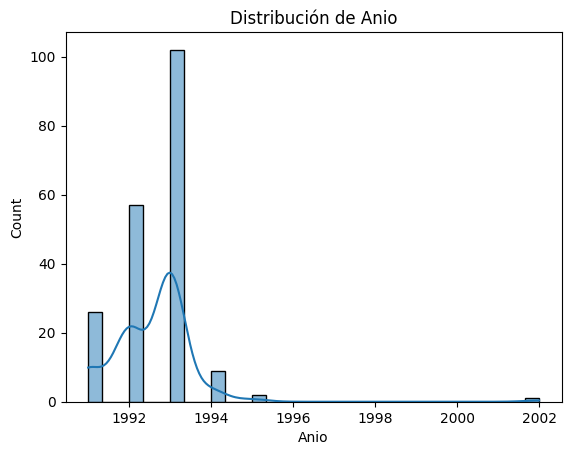

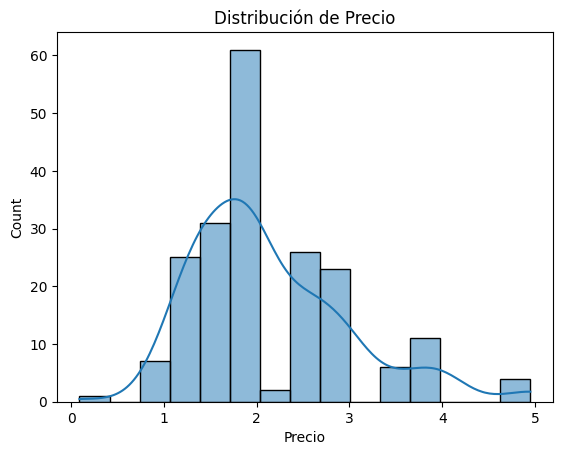

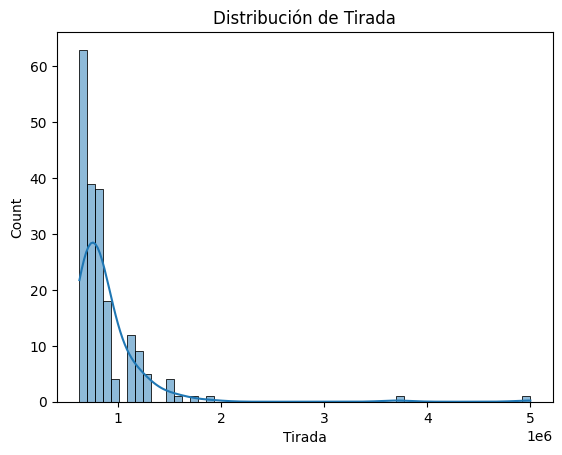

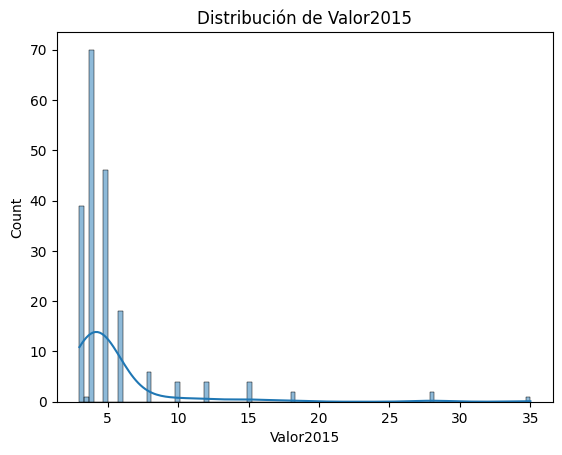

In [68]:
# Columnas numéricas para ver como se disponen
numericas = ["Anio", "Precio", "Tirada", "Valor2015"]
for col in numericas:
    sns.histplot(comicdf[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

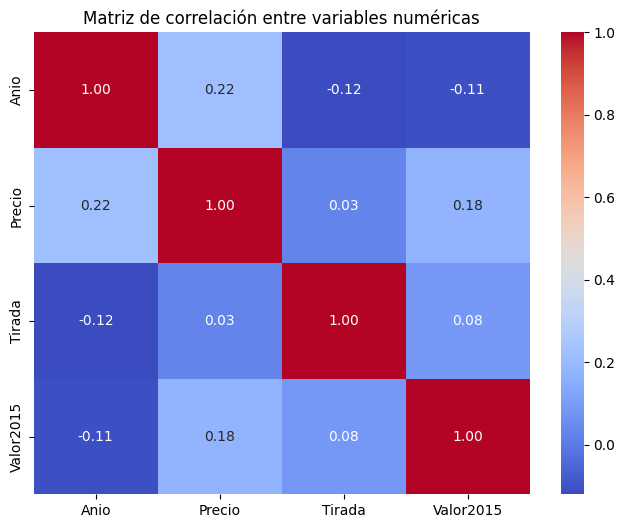

In [65]:
# Seleccionamos variables numéricas
numeric_cols = ['Anio', 'Precio', 'Tirada', 'Valor2015']

# Mapa de calor de correlaciones
corr_matrix = comicdf[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

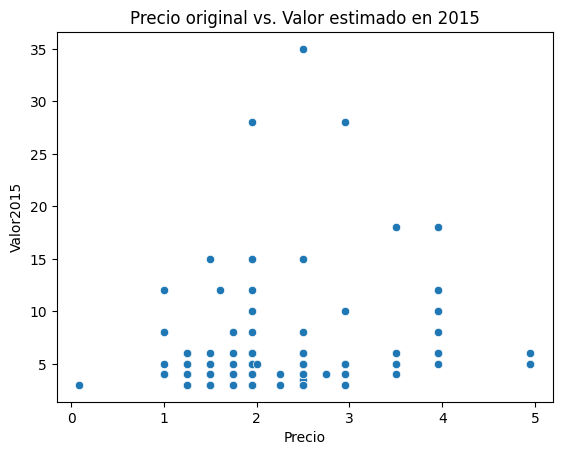

In [51]:
# Precio vs Valor 2015

sns.scatterplot(data=comicdf, x="Precio", y="Valor2015")
plt.title("Precio original vs. Valor estimado en 2015")
plt.show()

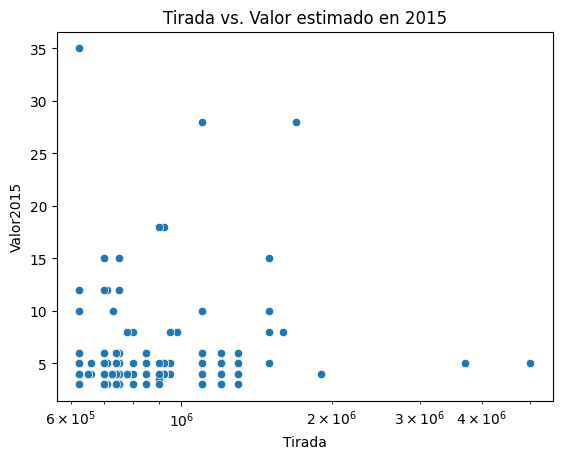

In [52]:
#Tirada vs Valor 2015

sns.scatterplot(data=comicdf, x="Tirada", y="Valor2015")
plt.title("Tirada vs. Valor estimado en 2015")
plt.xscale("log")  # porque hay tiradas muy altas
plt.show()

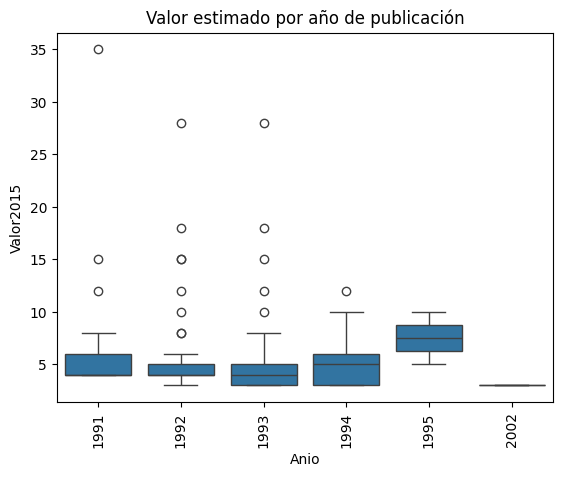

In [75]:
#Año de publicacion vs Valor 2015

sns.boxplot(data=comicdf, x="Anio", y="Valor2015")
plt.xticks(rotation=90)
plt.title("Valor estimado por año de publicación")
plt.show()

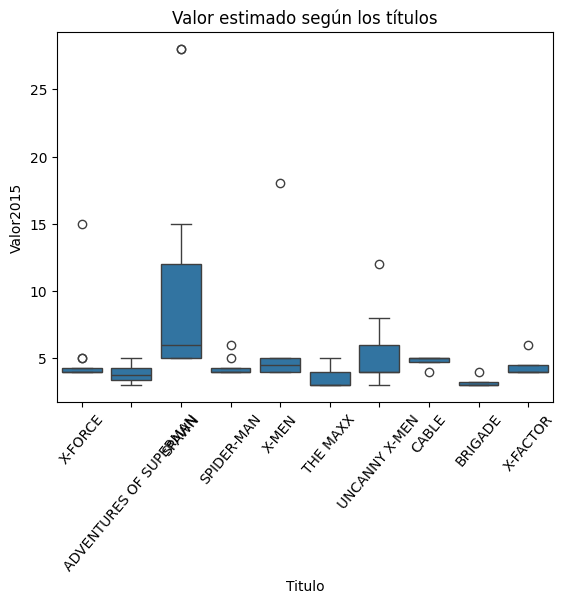

In [60]:
#distribución por titulos
titulos = comicdf['Titulo'].value_counts().head(10).index
sns.boxplot(data=comicdf[comicdf["Titulo"].isin(titulos)], x="Titulo", y="Valor2015")
plt.xticks(rotation=50)
plt.title("Valor estimado según los títulos")
plt.show()

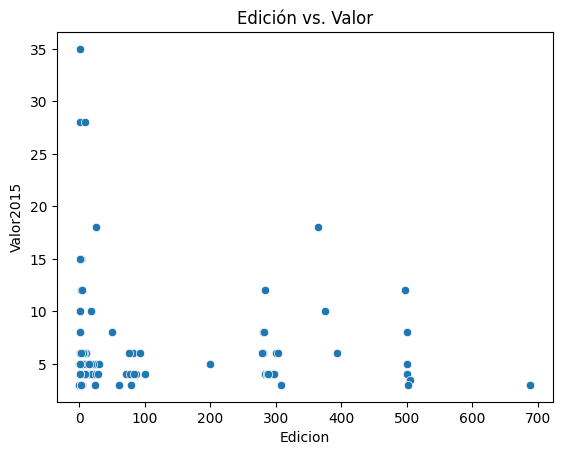

In [61]:
# Edicion
sns.scatterplot(data=comicdf, x="Edicion", y="Valor2015")
plt.title("Edición vs. Valor")
plt.show()

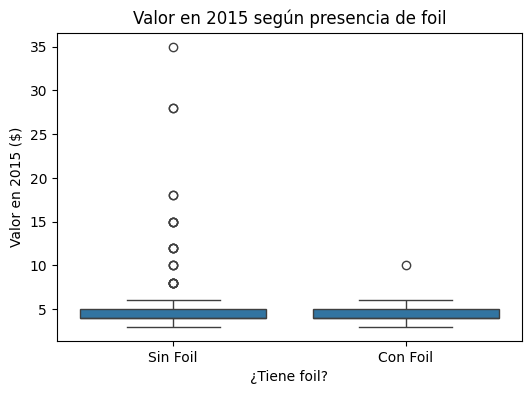

          count      mean       std  min  25%  50%  75%   max
has_foil                                                     
0         171.0  5.508772  4.336397  3.0  4.0  4.0  5.0  35.0
1          26.0  4.596154  1.371271  3.0  4.0  4.0  5.0  10.0


In [70]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='tiene_foil', y='Valor2015', data=comicdf)
plt.xticks([0, 1], ['Sin Foil', 'Con Foil'])
plt.title('Valor en 2015 según presencia de foil')
plt.ylabel('Valor en 2015 ($)')
plt.xlabel('¿Tiene foil?')
plt.show()

# Estadísticas descriptivas agrupadas
print(comicdf.groupby('has_foil')['Valor2015'].describe())

In [76]:
# De acuerdo con los gráficos y análisis, las variables que más parecen influir en el valor de reventa de un cómic en 2015 son el precio original, la tirada (relacionada con la rareza), y en menor medida, la presencia de elementos como foil. Los cómics más antiguos tienden a tener un mayor valor, aunque no de forma estrictamente lineal.